In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

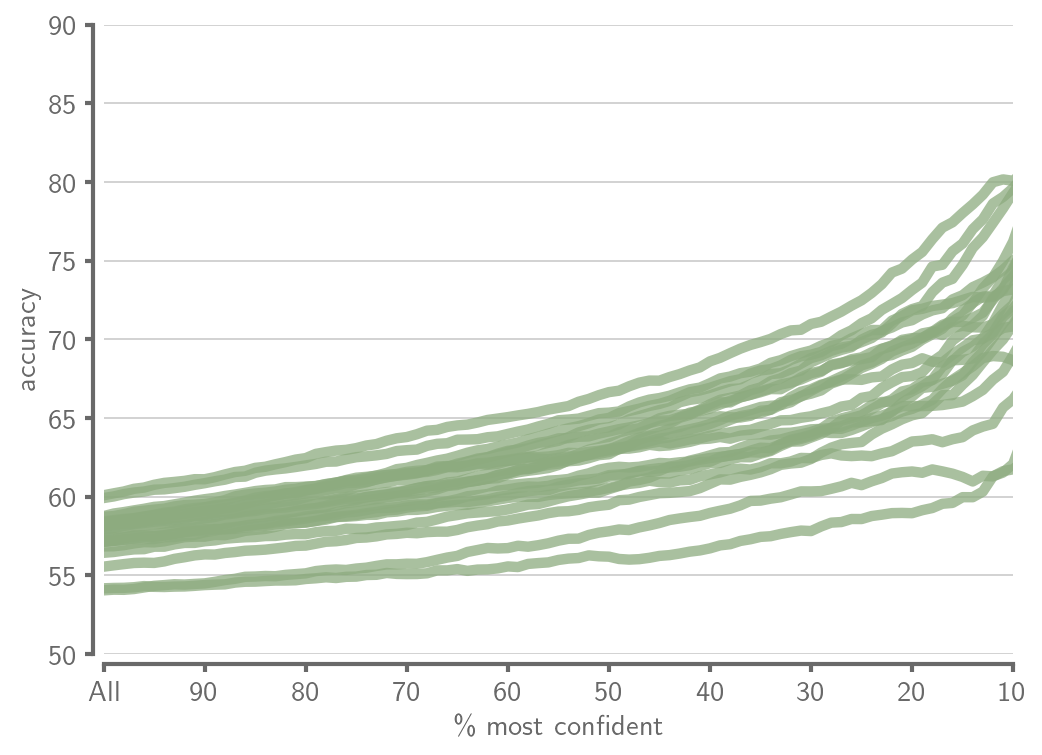

In [5]:
# data for panel (a)
ddir = base_dir+'test/confvsacc/kfold/'
EXP_NAME = 'exp2_kfold'

cesmcolor = 'k'
allobscolor = 'darkslateblue'
preTLcolor = (141/255,171/255,127/255,1.)
postTLcolor = 'cadetblue'
diffcolor = 'grey'
FS = 14

fig = plt.figure(figsize=(7,5))
ax = fig.subplot_mosaic('''
                        A
                        ''')
plt.tight_layout(w_pad=1,h_pad=3.5)
loc = 'A'
adjust_spines(ax[loc], ['left', 'bottom'])
ax[loc].spines['top'].set_color('none')
ax[loc].spines['right'].set_color('none')
ax[loc].spines['left'].set_color('dimgrey')
ax[loc].spines['bottom'].set_color('dimgrey')
ax[loc].spines['left'].set_linewidth(2)
ax[loc].spines['bottom'].set_linewidth(2)
ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
ax[loc].set_ylim(50,90)
ax[loc].set_xlim(0,90)
ax[loc].set_ylabel('accuracy',fontsize=FS,color='dimgrey')
ax[loc].set_yticks(np.arange(50,95,5),labels=np.arange(50,95,5),fontsize=FS,color='dimgrey')
ax[loc].set_xticks(np.arange(0,100,10),['All',90,80,70,60,50,40,30,20,10],fontsize=FS,color='dimgrey')
ax[loc].set_xlabel('\% most confident',fontsize=FS,color='dimgrey')
        
for kk in range(20):
    finame = 'confvsacc_ann1_60Eshift_'+EXP_NAME+'.'+str(kk)+'.npy'
    ann1_acc = np.load(ddir+finame)
    ann1_acc[ann1_acc==0] = np.nan
    ann1_acc_avg = np.nanmedian(ann1_acc,axis=0)

    ax['A'].plot(ann1_acc_avg, '-', color=preTLcolor, alpha=0.75,linewidth=5)
plt.show()

### PLOT